In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/learning-to-count22/train.txt
/kaggle/input/learning-to-count22/test/test/test/test_composite000000426.png
/kaggle/input/learning-to-count22/train/train/train/train_composite000012068.png


In [ ]:
df_train = pd.read_csv('/kaggle/input/learning-to-count22/train.txt',sep=' ',header=None)

  0%|          | 0/15000 [00:00<?, ?it/s]

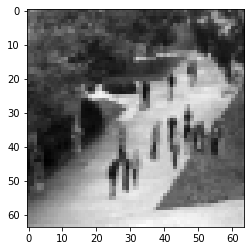

label: 20


In [ ]:
import imageio
from skimage import transform,io
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Read images and store into a np array
data_dir = '/kaggle/input/learning-to-count22/train/train/'

# We will resize the original images to this new shape
im_size = 64

X = [] # Array of images
y = [] # Array of labels

for ind, item in tqdm(df_train.iterrows(), total=len(df_train)):
    
    # Normalize values in the 0-1 range
    im = imageio.imread(data_dir + item[0])/255.
    
    # Resize all images to 64x64
    small_im = transform.resize(im, (im_size,im_size), mode='symmetric', preserve_range=True)
    X.append(small_im)
    y.append(item[1])
    
X = np.array(X)
y = np.array(y)

plt.imshow(X[0],cmap='gray')
plt.show()
print("label:", y[0])

In [ ]:
X.shape

(15000, 64, 64)

# Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation
# Train: 80%
# Validation: 20%
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.2, random_state=66)

In [ ]:
## Train the model with a Neural Network
import tensorflow as tf
from tensorflow import keras

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# The model

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[64, 64]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1, activation="linear"))

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1229100   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,259,301
Trainable params: 1,259,301
Non-trainable params: 0
_________________________________________________________________


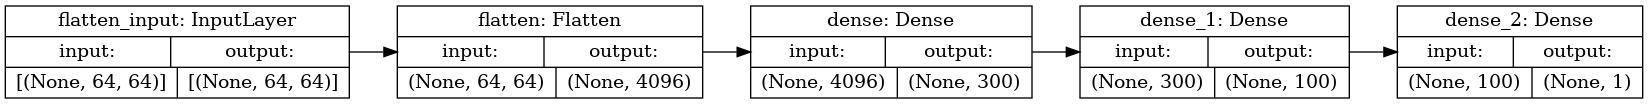

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, rankdir='LR')

In [ ]:
model.compile(loss="mean_squared_error",
              optimizer="rmsprop")

## Train the model

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_val, y_val),verbose=1)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 77.0871 - val_loss: 42.4003
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 45.1720 - val_loss: 24.4195
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 34.5777 - val_loss: 83.0095
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 29.4797 - val_loss: 15.9868
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 25.5779 - val_loss: 38.3837
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 23.0720 - val_loss: 9.7473
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 21.4771 - val_loss: 9.2254
Epoch 8/10
375/375 [==============================] - 3s 9ms/step - loss: 19.5566 - val_loss: 10.7439
Epoch 9/10
375/375 [==============================] - 3s 9ms/step - loss: 18.1747 - val_loss: 29.2928
Epoch 10/10
375/375 [==============================] - 3s 9ms/step - loss: 17.512

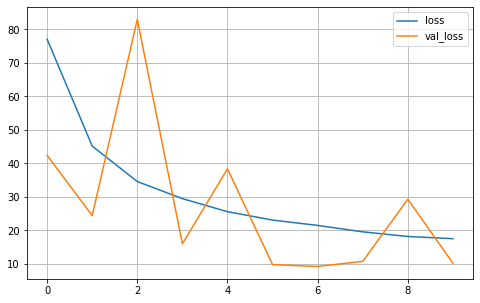

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.show()

## Evaluate the validation set

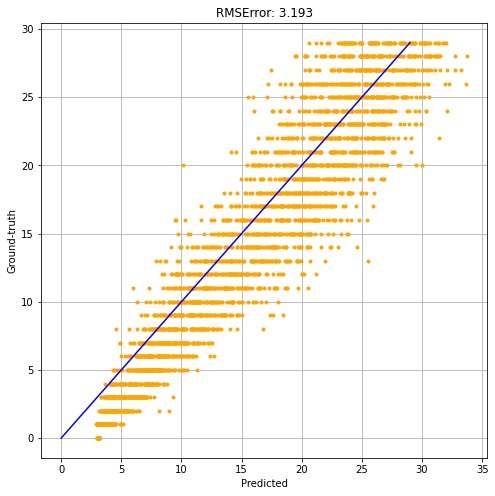

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_val)

linear = range(max(y_val)+1)

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.plot(y_pred,y_val,'.', c='orange')
ax.plot(linear, linear, c='blue')

ax.set_xlabel('Predicted')
ax.set_ylabel('Ground-truth')
ax.grid()

ax.set_title(f'RMSError: {np.sqrt(mean_squared_error(y_pred, y_val)):.3f}')

plt.show()

## Evaluate the test set

In [ ]:
## evaluate test and generate submission
test_dir = '/kaggle/input/learning-to-count22/test/test/test/'
im_size = 64

X_test = []
N = 500 # The test set contains 500 images

for x in range(N):
    
    # Normalize the data
    im = imageio.imread(test_dir + 'test_composite'+str(x).zfill(9) + '.png')/255.
    
    small_im = transform.resize(im, (im_size,im_size), mode='symmetric', preserve_range=True)
    X_test.append(small_im)
    
X_test = np.array(X_test)

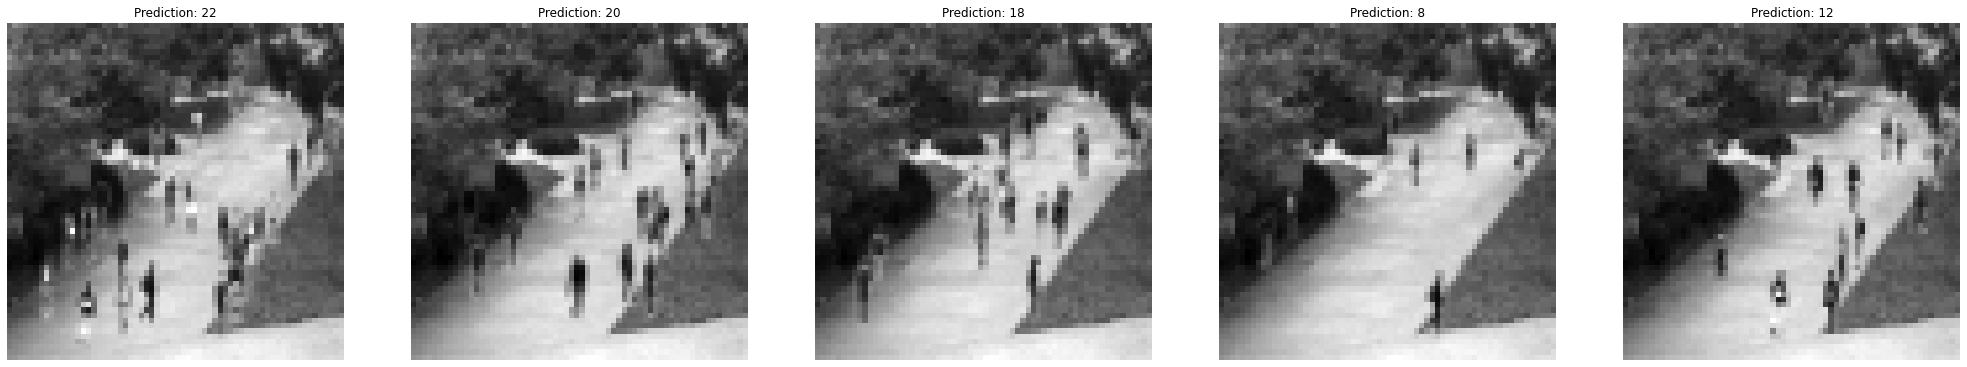

In [ ]:
fig, axs = plt.subplots(1,5, figsize=(35,8))
for ax in axs:
    rand_idx = np.random.randint(0, 500)
    ax.imshow(X_test[rand_idx], cmap='gray')
    
    pred = int(model.predict(np.expand_dims(X_test[rand_idx], 0))[0][0])
    ax.set_title(f'Prediction: {pred}')
    ax.axis('off')

plt.show()

# Submission

In [ ]:
# create the file to make the sumbission
y_test = model.predict(X_test)
y_test = [int(x[0]) for x in y_test]

df_output = pd.DataFrame(y_test)
df_output.index.name = 'index'
df_output.columns = ['prediction']
df_output.to_csv('output.csv')

In [ ]:
df_output

,prediction
index,
0,29
1,20
2,12
3,25
4,24
...,...
495,3
496,18
497,7
